In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Titanic dataset

The titanic dataset as the name suggests is about the titanic ship that sank in 1912. The dataset contains information about the passengers on the ship. The dataset is available on [Kaggle](https://www.kaggle.com/c/titanic/data). Download the dataset and save it in the same directory as this notebook and follow along! 

## data selection and understanding

This is the first step to build our model. We select our data including the target variable and the features. The target variable is the variable that we want to predict. In this case, it is the survival of the passengers. The features are the variables that we use to predict the target variable. In this case, it is the passenger information.

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

combine = [train, test]

now that we've imported the dataset, let's take a look at the data. We can use the `head()` method to see the first few rows of the dataset.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Great! We can see that the dataset contains information about the passengers on the ship. The dataset contains the following columns:

- PassengerId: The id of the passenger (numerical)
- Survived: Whether the passenger survived or not (binary)
- Pclass: The class of the passenger (1st, 2nd or 3rd) which is a proxy for socio-economic status (categorical)
- Name: The name of the passenger (string)
- Sex : Whether male or female (binary)
- Age: The age of the passenger (numerical)
- SibSp: The number of siblings or spouses the passenger had on board (numerical)
- Parch: The number of parents or children the passenger had on board (numerical)
- Ticket: The ticket number (string)
- Fare: The amount of money the passenger paid for the ticket (numerical)
- Cabin: The cabin number (string)
- Embarked: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton) (categorical)

# Data preprocessing

Since no dataset is perfect, we need to do some preprocessing before we can use it. In the preprocessing step, we will look for the following things:
- Missing values : values that are not present in the dataset. Unfortunately, our machine learning algorithms need all the values to be present. So we will have to fill in the missing values or find a way to approximate them.
- Outliers : values that are too far from the rest of the values. These values can skew our results. So we will have to remove them.
- noise : values like a name or an id that are not useful for our machine learning algorithms. We will have to remove them as well.

## missing value

In [10]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The distribution of the categorical features:

- name is unique for 891 records
- Sex variable has two unique values (male or female) 65% is male (577/891)
- embarked takes 3 values, S port used by most passengers (644/891)

In [17]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### assumptions based on the data analysis

**Correlating**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.

**Creating**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.

**Classifying**

We may also add to our assumptions based on the problem description noted earlier.

- Women (Sex=female) were more likely to have survived.
- Children (Age<?) were more likely to have survived.
- The upper-class passengers (Pclass=1) were more likely to have survived.

## analysis by pivoting features

Feature pivoting is used to find the correlation between features and the target variable. We can use the `groupby()` method to pivot features against each other. Let's see how we can do this.

In [18]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [28]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## analysis by visualising data

We can also visualise to check the correlation between features and the target variable.

<Axes: xlabel='Survived', ylabel='Age'>

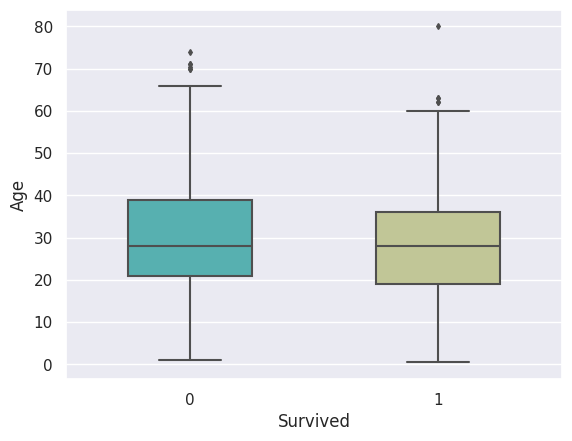

In [79]:
sns.boxplot(x="Survived", y="Age", data=train, palette='rainbow', orient='v', width=0.5, fliersize=3, linewidth=1.5, notch=False, saturation=0.5, ax=None)

<Axes: xlabel='Age', ylabel='Count'>

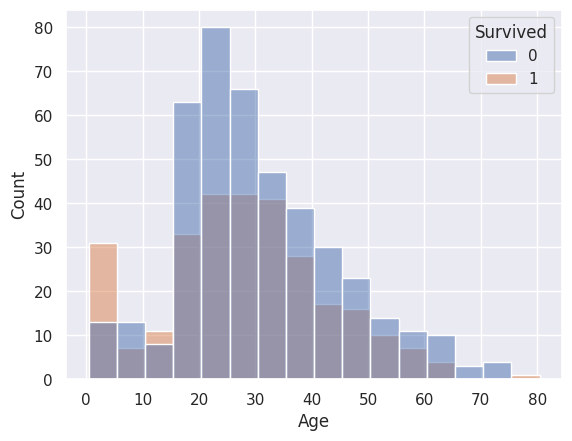

In [81]:
sns.histplot(x="Age", hue="Survived", data=train, binwidth=5)